In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import torchvision
import torchvision.transforms as transforms
from torchvision.utils import make_grid
from sklearn import metrics
import os

Here we have semantic (or class) segmentation: we paint each front door as dark green, even if we have 5 or just 1 in the image (as opposed to instance segmentation, where we would assign a different color to each front door object/instance)

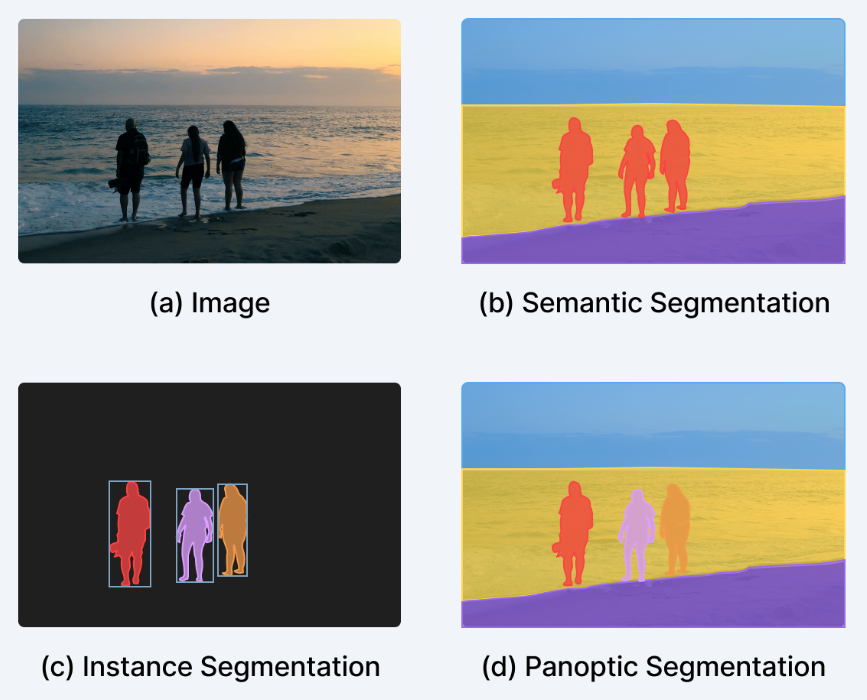

Useful links & resources:

- https://towardsdatascience.com/efficient-image-segmentation-using-pytorch-part-1-89e8297a0923
- https://www.tensorflow.org/tutorials/images/segmentation
- https://github.com/sheikhazhanmohammed/sadma
- https://www.kaggle.com/code/yassinealouini/all-the-segmentation-metrics
- https://github.com/milesial/Pytorch-UNet
- https://github.com/asanakoy/kaggle_carvana_segmentation/tree/master

Pretrained models:

- https://pytorch.org/serve/model_zoo.html
- https://pytorch.org/vision/stable/models.html#object-detection-instance-segmentation-and-person-keypoint-detection

In [2]:
# Image names in all folders are of the form XXXX.png (ex: 0001.png)

IMAGES_FOLDER = './carseg_data/images/'
BLACK_CAR_FOLDER = 'black_5_doors/'
ORANGE_CAR_FOLDER = 'orange_3_doors/'
REAL_CAR_FOLDER = 'photo/'
SEGMENTATION_FOLDER = 'with_segmentation/'
NO_SEGMENTATION_FOLDER = 'no_segmentation/'

torch.Size([3, 360, 640]) tensor(255, dtype=torch.uint8)


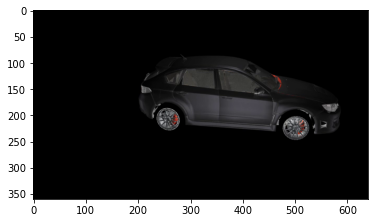

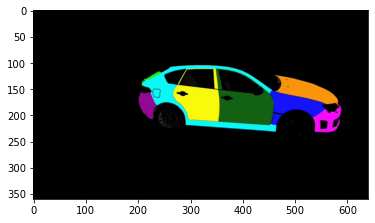

In [3]:
# Read images and see examples
IMAGE_PATH = '/0001.png'

image_original = torchvision.io.read_image(IMAGES_FOLDER + BLACK_CAR_FOLDER + NO_SEGMENTATION_FOLDER + IMAGE_PATH)
image_segmented = torchvision.io.read_image(IMAGES_FOLDER + BLACK_CAR_FOLDER + SEGMENTATION_FOLDER + IMAGE_PATH)

print(image_original.shape, image_original.max())

plt.imshow(image_original.permute(1, 2, 0))
plt.show()
plt.imshow(image_segmented.permute(1, 2, 0))
plt.show()

In [4]:
# The shapes of all 3 categories of images, different across folders but consisten inside itself
# Also the maximum in all images is 255, so scaling all images by dividing with 255 would be appropriate

BLACK_DIR_ORIGINAL = IMAGES_FOLDER + BLACK_CAR_FOLDER + NO_SEGMENTATION_FOLDER
ORANGE_DIR_ORIGINAL = IMAGES_FOLDER + ORANGE_CAR_FOLDER + NO_SEGMENTATION_FOLDER
REAL_DIR_ORIGINAL = IMAGES_FOLDER + REAL_CAR_FOLDER + NO_SEGMENTATION_FOLDER

images_max = torch.tensor(0)

unique_shapes = set()
for file in os.listdir(BLACK_DIR_ORIGINAL):
    filename = os.fsdecode(file)
    image = torchvision.io.read_image(BLACK_DIR_ORIGINAL + filename)
    images_max = max(images_max, image.max())
    unique_shapes.add(image.shape)
print("Black unique shapes: " + str(unique_shapes))

unique_shapes = set()
for file in os.listdir(ORANGE_DIR_ORIGINAL):
    filename = os.fsdecode(file)
    image = torchvision.io.read_image(ORANGE_DIR_ORIGINAL + filename)
    images_max = max(images_max, image.max())
    unique_shapes.add(image.shape)
print("Orange unique shapes: " + str(unique_shapes))

unique_shapes = set()
for file in os.listdir(REAL_DIR_ORIGINAL):
    filename = os.fsdecode(file)
    image = torchvision.io.read_image(REAL_DIR_ORIGINAL + filename)
    images_max = max(images_max, image.max())
    unique_shapes.add(image.shape)
print("Real unique shapes: " + str(unique_shapes))

print("Images max: " + str(images_max))

Black unique shapes: {torch.Size([3, 360, 640])}
Orange unique shapes: {torch.Size([3, 576, 788])}
Real unique shapes: {torch.Size([3, 256, 256])}
Images max: tensor(255, dtype=torch.uint8)


In [5]:
ARRAYS_FOLDER = './carseg_data/arrays/'
BLACK_ARRAY_PREFIX = 'black_5_doors_'
ORANGE_ARRAY_PREFIX = 'orange_3_doors_'
PHOTO_ARRAY_PREFIX = 'photo_'

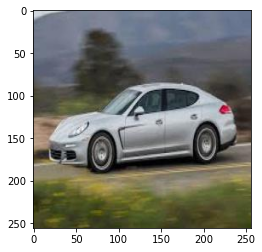

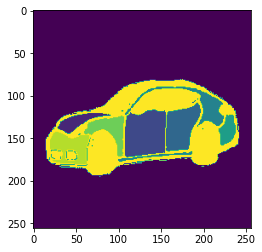

(256, 256, 4) 255
[0, 10, 20, 30, 40, 50, 70, 80, 90]


In [6]:
# Read and analyse and describe the .npy files
npy_file = np.load('./carseg_data/arrays/photo_0001.npy')

plt.imshow(npy_file[:,:,0:3])
plt.show()
plt.imshow(npy_file[:,:,3])
plt.show()
print(npy_file.shape, npy_file.max())

unique_color_labels = set()
[unique_color_labels.add(x) for x in npy_file[:,:,3].flatten()]

print(sorted(unique_color_labels)) # this corresponds to the 9 classes/segments described in the readme

In [7]:
# Check that all .npy files have the same shape and structure
unique_shapes = set()
for file in os.listdir(ARRAYS_FOLDER):
    filename = os.fsdecode(file)
    image = np.load(ARRAYS_FOLDER + filename)
    unique_shapes.add(image.shape)
    
print("Numpy files unique shapes: " + str(unique_shapes))

Numpy files unique shapes: {(256, 256, 4)}


In [16]:
# Split the data into train-test-validation
# I think that we only need the npy files

In [17]:
# Build a very simple U-Net (Dice loss function? or SparseCategoricalCrossentropy from logits?)

In [18]:
# Try to run the model locally and on the HPC server to see that it works

In [19]:
# Run the output on the test set

In [20]:
# Try pretrained models: MobileNetV2, ResNet101